In [1]:
%load_ext autoreload
%autoreload 2

from PIL import Image
import torch
import numpy as np

from generate_dataset import ring_dataset

/home/juluis/anaconda3/envs/ImageGeneration/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
def create_ring_img(N, center, inner, outer):
    img_coor = [[(i, j) for i in range(N)] for j in range(N)]
    radius = np.linalg.norm(np.array(img_coor) - center, axis=2)
    img = torch.zeros(radius.shape, dtype=torch.uint8)
    for i in range(N):
        for j in range(N):
            if radius[i, j] >= inner and radius[i, j] < outer:
                img[i, j] = 255

    return img

In [114]:
def create_ring_img(img_coor, center, inner, outer):
    radius = np.linalg.norm(img_coor - center, axis=2)
    img = np.zeros_like(radius, dtype=np.uint8)
    
    img[np.logical_and(radius >= inner, radius < outer)] = 255

    return img

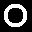

In [115]:
Image.fromarray(create_ring_img(32, 15, 8, 12))

In [55]:
np.array([[(i, j) for i in range(N)] for j in range(N)]).reshape((32*32, 2))

array([[ 0,  0],
       [ 1,  0],
       [ 2,  0],
       ...,
       [29, 31],
       [30, 31],
       [31, 31]])

In [92]:
N = 32
centers = np.array([[(i, j) for i in range(N)] for j in range(N)]).reshape((N * N, 2))
rings = []
for inner in np.arange(N * 0.1, N * 0.4):
    for outer in np.arange(inner + N * 0.05, N * 0.45):
        rings.append((inner, outer))

simple_rings = []
for i in range(10000):
    center = centers[np.random.choice(N * N)]
    inner, outer = rings[np.random.choice(len(rings))]
    simple_rings.append(create_ring_img(N, center, inner, outer))

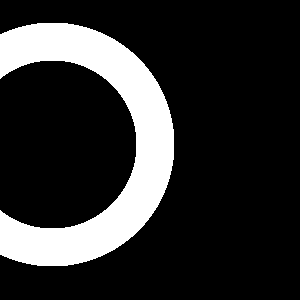

In [90]:
Image.fromarray(simple_rings[2].numpy())

In [29]:
dataset = ring_dataset()
rings = dataset.generate_dataset()

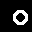

In [59]:
Image.fromarray(dataset.img[np.random.choice(10000)])

In [14]:
np.array([0, 1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])